In [3]:
import matplotlib.pylab as plt
#!pip install netCDF4
#!pip install -U matplotlib==3.2
#!pip uninstall -y numpy
#!pip install numpy
#!pip install pyproj==1.9.6
#!apt-get install libgeos-3.5.0
#!apt-get install libgeos-dev
#!pip install https://github.com/matplotlib/basemap/archive/master.zip
#!pip install sdv
from netCDF4 import Dataset, num2date
import pandas as pd
#from matplotlib.cbook import dedent
#from mpl_toolkits.basemap import Basemap
import numpy as np
%matplotlib inline
import xarray
import netCDF4 as nc
#conda install xarray or pip install xarray

In [4]:
import tensorflow as tf
physical_devices = tf.config.experimental.list_physical_devices('GPU')
assert len(physical_devices) > 0, "Not enough GPU hardware devices available"
#import tensorflow as tf
#tf.config.experimental.set_memory_growth(tf.config.list_physical_devices('GPU')[0], True)

In [5]:
hycom_temp_FEB=pd.read_csv('hycom_reanalysis_02.csv')
hycom_ssh_FEB=pd.read_csv('hycom_reanalysis_ssh_02.csv')
hycom_temp_AUG=pd.read_csv('hycom_reanalysis_08.csv')
hycom_ssh_AUG=pd.read_csv('hycom_reanalysis_ssh_08.csv')

In [6]:
hycom_ssh_AUG=hycom_ssh_AUG[['DATE','SSH']]
hycom_temp_AUG=hycom_temp_AUG[['DATE','0','10','20','30','50','75','100','125','150','200','250']]
hycom_ssh_FEB=hycom_ssh_FEB[['DATE','SSH']]
hycom_temp_FEB=hycom_temp_FEB[['DATE','0','10','20','30','50','75','100','125','150','200','250']]

In [7]:
hycom_reanal_FEB=hycom_temp_FEB.merge(hycom_ssh_FEB, how='inner',on='DATE')
hycom_reanal_AUG=hycom_temp_AUG.merge(hycom_ssh_AUG, how='inner',on='DATE')

In [40]:
hycom_reanal_FEB

,DATE,0,10,20,30,50,75,100,125,150,200,250,SSH
0,1993-02-15,11.486597,11.469694,11.465420,11.463098,11.458368,11.491535,11.470583,10.841994,9.646852,6.342945,4.043180,0.117961
1,1994-02-15,10.554420,10.491810,10.438349,10.298292,9.442877,7.573664,5.594977,3.972298,2.771014,1.539271,1.141693,0.007627
2,1995-02-15,11.703115,11.683424,11.677102,11.673450,11.667281,11.671911,11.567665,10.632973,9.099081,5.696625,3.812521,0.174680
3,1996-02-15,10.197273,10.170321,10.132137,10.063843,9.892378,9.306554,7.576443,5.610853,4.219519,2.358105,1.452782,0.015549
4,1997-02-15,11.584479,11.527486,11.456809,11.337120,10.936574,9.373585,7.351861,5.482757,3.952755,2.151883,1.334766,0.028707
5,1998-02-15,12.357797,12.325155,12.312761,12.294662,12.209061,11.323483,8.757849,6.162896,4.171515,1.798075,0.929079,0.055546
6,1999-02-15,11.425038,11.427711,11.419494,11.413528,11.403368,11.429113,11.303359,10.081977,8.192090,5.105734,3.583555,0.089690
7,2000-02-15,11.816671,11.800066,11.790947,11.784157,11.758410,11.336166,9.225456,6.917091,5.274559,3.382572,2.381209,0.051819
8,2001-02-15,11.644275,11.627997,11.618605,11.612170,11.601535,11.626657,11.386594,10.487092,9.090709,5.626200,3.774738,0.175695
9,2002-02-15,11.412297,11.386775,11.367420,11.353065,11.330183,11.172794,9.663347,7.464910,5.752941,3.496678,2.253685,0.016850


In [8]:
from sdv.constraints import GreaterThan
depth_temp_0_10_const = GreaterThan(
low='10',
high='0',
handling_strategy='reject_sampling')
#0	10	20	30	50	75	100	125	150	200	250	300	400	500
depth_temp_20_10_const = GreaterThan(
low='20',
high='10',
handling_strategy='reject_sampling')

depth_temp_30_20_const = GreaterThan(
low='30',
high='20',
handling_strategy='reject_sampling')

depth_temp_50_30_const = GreaterThan(
low='50',
high='30',
handling_strategy='reject_sampling')

depth_temp_75_50_const = GreaterThan(
low='75',
high='50',
handling_strategy='reject_sampling')

depth_temp_100_75_const = GreaterThan(
low='100',
high='75',
handling_strategy='reject_sampling')

depth_temp_125_100_const = GreaterThan(
low='125',
high='100',
handling_strategy='reject_sampling')

depth_temp_150_125_const = GreaterThan(
low='150',
high='125',
handling_strategy='reject_sampling')


depth_temp_200_150_const = GreaterThan(
low='200',
high='150',
handling_strategy='reject_sampling')


depth_temp_250_200_const = GreaterThan(
low='250',
high='200',
handling_strategy='reject_sampling')

depth_temp_300_250_const = GreaterThan(
low='300',
high='250',
handling_strategy='reject_sampling')

depth_temp_400_300_const = GreaterThan(
low='400',
high='300',
handling_strategy='reject_sampling')

depth_temp_500_400_const = GreaterThan(
low='500',
high='400',
handling_strategy='reject_sampling')

constraints_upper = [depth_temp_0_10_const,
                     depth_temp_20_10_const,
                     depth_temp_30_20_const,
                     depth_temp_50_30_const,
                     depth_temp_75_50_const,
                     depth_temp_100_75_const,
                     depth_temp_125_100_const,
                     depth_temp_150_125_const,
                     depth_temp_200_150_const,
                     depth_temp_250_200_const,
                     depth_temp_300_250_const,
                     depth_temp_400_300_const,
                     depth_temp_500_400_const]

constraints_upper2 = [depth_temp_0_10_const,
                     depth_temp_20_10_const,
                     depth_temp_30_20_const,
                     depth_temp_50_30_const,
                     depth_temp_75_50_const,
                     depth_temp_100_75_const,
                     depth_temp_125_100_const,
                     depth_temp_150_125_const,
                     depth_temp_200_150_const,
                     depth_temp_250_200_const,
                     depth_temp_300_250_const]



depth_temp_20_0_const = GreaterThan(
low='20',
high='0',
handling_strategy='reject_sampling')

depth_temp_50_20_const = GreaterThan(
low='50',
high='0',
handling_strategy='reject_sampling')


depth_temp_100_50_const = GreaterThan(
low='100',
high='50',
handling_strategy='reject_sampling')


depth_temp_150_100_const = GreaterThan(
low='150',
high='100',
handling_strategy='reject_sampling')


depth_temp_200_150_const = GreaterThan(
low='200',
high='150',
handling_strategy='reject_sampling')


constraints_upper3 = [depth_temp_20_0_const,
                      depth_temp_50_20_const,
                      depth_temp_100_50_const]

In [9]:
from sdv.tabular import CopulaGAN
from sdv.tabular import GaussianCopula
from sdv.tabular import TVAE
#model_upper = CopulaGAN(constraints=constraints_upper)
#model=CopulaGAN()
#model_upper.fit(ocean_train_upper)
#model.fit(reshape_ocean_df_1965)
#model_upper.sample(100, max_retries=100000, conditions=conditions)
#model_output=model.sample(1000, max_retries=1000000)
#reshape_ocean_df_1965.hist()
#model_output.hist()

#model=CopulaGAN(constraints=constraints_upper3)

model=TVAE()

    
#model=CopulaGAN(constraints=constraints_upper3)
model=TVAE()
for mon in ['FEB','AUG']:
    model.fit(globals()['hycom_reanal_'+mon])
    model_output=model.sample(2000, max_retries=1000000)
    model_output['10']=np.where((model_output['10']>model_output['0']),model_output['0'],model_output['10'])
    model_output['20']=np.where((model_output['20']>model_output['10']),model_output['10'],model_output['20'])
    model_output['30']=np.where((model_output['30']>model_output['20']),model_output['20'],model_output['30'])
    model_output['50']=np.where((model_output['50']>model_output['30']),model_output['30'],model_output['50'])
    model_output['75']=np.where((model_output['75']>model_output['50']),model_output['50'],model_output['75'])
    model_output['100']=np.where((model_output['100']>model_output['75']),model_output['75'],model_output['100'])
    model_output['125']=np.where((model_output['125']>model_output['100']),model_output['100'],model_output['125'])
    model_output['150']=np.where((model_output['150']>model_output['125']),model_output['125'],model_output['150'])
    model_output['200']=np.where((model_output['200']>model_output['150']),model_output['150'],model_output['200'])
    model_output['250']=np.where((model_output['250']>model_output['200']),model_output['200'],model_output['250'])  
    globals()['model_output_df_'+mon]=model_output
    globals()['temp_tvae_model_output_df_'+mon]=model_output

    
model=GaussianCopula(constraints=constraints_upper3)
for mon in ['FEB','AUG']:
    model.fit(globals()['hycom_reanal_'+mon])
    model_output=model.sample(2000, max_retries=1000000)
    model_output['10']=np.where((model_output['10']>model_output['0']),model_output['0'],model_output['10'])
    model_output['20']=np.where((model_output['20']>model_output['10']),model_output['10'],model_output['20'])
    model_output['30']=np.where((model_output['30']>model_output['20']),model_output['20'],model_output['30'])
    model_output['50']=np.where((model_output['50']>model_output['30']),model_output['30'],model_output['50'])
    model_output['75']=np.where((model_output['75']>model_output['50']),model_output['50'],model_output['75'])
    model_output['100']=np.where((model_output['100']>model_output['75']),model_output['75'],model_output['100'])
    model_output['125']=np.where((model_output['125']>model_output['100']),model_output['100'],model_output['125'])
    model_output['150']=np.where((model_output['150']>model_output['125']),model_output['125'],model_output['150'])
    model_output['200']=np.where((model_output['200']>model_output['150']),model_output['150'],model_output['200'])
    model_output['250']=np.where((model_output['250']>model_output['200']),model_output['200'],model_output['250'])
    globals()['model_output_df_'+mon]=pd.concat([model_output,pd.DataFrame(globals()['temp_tvae_model_output_df_'+mon])])
    #globals()['model_output_df_'+mon]=model_output    

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuse

In [10]:
hycom_model_output_df_FEB=model_output_df_FEB

In [11]:
# get the dataset
def get_hycom_syn_dataset(season):
    #X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
    #X,y=
    if (season=='FEB') : temp=hycom_model_output_df_FEB[(hycom_model_output_df_FEB['DATE'].str.contains("-02-"))]
    elif (season=='APR') : temp=hycom_model_output_df_APR[(hycom_model_output_df_APR['DATE'].str.contains("-04-"))]
    elif (season=='JUN') : temp=hycom_model_output_df_JUN[(hycom_model_output_df_JUN['DATE'].str.contains("-06-"))]
    elif (season=='AUG') : temp=hycom_model_output_df_AUG[(hycom_model_output_df_AUG['DATE'].str.contains("-08-"))]
    elif (season=='OCT') : temp=hycom_model_output_df_OCT[(hycom_model_output_df_OCT['DATE'].str.contains("-10-"))]
    elif (season=='DEC') : temp=hycom_model_output_df_DEC[(hycom_model_output_df_DEC['DATE'].str.contains("-12-"))]            
    #elif (season=='APR'):
    #                     temp=reshape_ocean_df[(reshape_ocean_df['Station-Point']==str(station))&(reshape_ocean_df['DATE'].str.contains("-04-"))]
    
    
    
    X=temp[['0','SSH']]
    y=temp[['10','20','30','50','75','100','125','150','200','250']]
    return X, y

In [12]:
hycom_test_FEB=hycom_reanal_FEB[(hycom_reanal_FEB["DATE"]>'2012-01-01')&(hycom_reanal_FEB["DATE"]<'2018-01-01')]
hycom_test_FEB=hycom_test_FEB[['DATE','SSH','0','10','20','30','50','75','100','125','150','200','250']]
hycom_test_AUG=hycom_reanal_AUG[(hycom_reanal_AUG["DATE"]>'2012-01-01')&(hycom_reanal_AUG["DATE"]<'2018-01-01')]
hycom_test_AUG=hycom_test_AUG[['DATE','SSH','0','10','20','30','50','75','100','125','150','200','250']]

In [13]:
# get the dataset
def get_hycom_test_dataset(season):
    #X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
    #X,y=
    if (season=='FEB') : temp=hycom_test_test[(hycom_test_FEB['DATE'].str.contains("-02-"))]
    elif (season=='APR') : temp=hycom_test_APR[(hycom_test_APR['DATE'].str.contains("-04-"))]
    elif (season=='JUN') : temp=hycom_test_JUN[(hycom_test_JUN['DATE'].str.contains("-06-"))]
    elif (season=='AUG') : temp=hycom_test_AUG[(hycom_test_AUG['DATE'].str.contains("-08-"))]
    elif (season=='OCT') : temp=hycom_test_OCT[(hycom_test_OCT['DATE'].str.contains("-10-"))]
    elif (season=='DEC') : temp=hycom_test_DEC[(hycom_test_DEC['DATE'].str.contains("-12-"))]            
    #elif (season=='APR'):
    #                     temp=reshape_ocean_df[(reshape_ocean_df['Station-Point']==str(station))&(reshape_ocean_df['DATE'].str.contains("-04-"))]
    
    
    
    X=temp[['0','SSH']]
    y=temp[['10','20','30','50','75','100','125','150','200','250']]
    return X,y

In [14]:
from sklearn.multioutput import RegressorChain
from sklearn.multioutput import MultiOutputRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor
from matplotlib import pyplot
#Regression Chain Model

level0 = list()
#level0.append(('lin_reg', RegressorChain(SVR())))
level0.append(('knn_reg', RegressorChain(KNeighborsRegressor())))
level0.append(('rnd_reg', RegressorChain(RandomForestRegressor(n_estimators=100, random_state=5))))
level0.append((('svr_reg',  RegressorChain(SVR(kernel = 'rbf')))))

#in_reg=RegressorChain(LinearRegression())
#nn_reg=RegressorChain(KNeighborsRegressor())
#nd_reg=RegressorChain(RandomForestRegressor(n_estimators=100, random_state=5))
#vr_reg=RegressorChain(SVR(kernel = 'rbf'))

reg=MultiOutputRegressor(StackingRegressor(estimators=level0, final_estimator=LinearRegression()))

reg.estimator.estimators_=reg.estimator.estimators
reg.estimator.final_estimator_=reg.estimator.final_estimator
reg.estimator.stack_method_=reg.estimator.stack_method

In [15]:
X, y = get_hycom_syn_dataset("FEB")

In [16]:
X

,0,SSH
0,10.991772,0.077330
1,11.263950,0.029377
2,10.535845,-0.000481
3,10.625079,0.102067
4,11.833283,0.056326
...,...,...
1995,10.471159,0.150391
1996,11.650573,0.099911
1997,11.966930,0.086516
1998,11.358876,0.127909


In [17]:
# dataset
#X, y=make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=1)

#define the base models
level0=list()
level0.append(('knn',KNeighborsRegressor()))
level0.append(('rf',RandomForestRegressor()))
level0.append(('svm',SVR()))

#define meta learner model
level1=LinearRegression()
#define the stacking ensemble
cv=RepeatedKFold(n_splits=10,n_repeats=5, random_state=1)
model=MultiOutputRegressor(StackingRegressor(estimators=level0, final_estimator=level1, cv=5))
model.estimator.final_estimator_ = model.estimator.final_estimator
model.fit(X,y)
#scores=cross_val_score(model, X, y,scoring='neg_mean_absolute_error',cv=cv, n_jobs=-1)

MultiOutputRegressor(estimator=StackingRegressor(cv=5,
                                                 estimators=[('knn',
                                                              KNeighborsRegressor()),
                                                             ('rf',
                                                              RandomForestRegressor()),
                                                             ('svm', SVR())],
                                                 final_estimator=LinearRegression()))

In [18]:
reshape_ocean_df=pd.read_csv('/gpu_deep/Deep_Ocean/reshape_ocean_df.csv')

In [19]:
reshape_ocean_df
reshape_ocean_df_ssh=reshape_ocean_df
reshape_ocean_df_ssh=reshape_ocean_df[(reshape_ocean_df["DATE"]>'1993-01-01')&(reshape_ocean_df["DATE"]<'2013-01-01')]

In [20]:
reshape_ocean_df_ssh=reshape_ocean_df_ssh.dropna()
reshape_ocean_df_ssh
reshape_ocean_df_test_ssh=reshape_ocean_df[(reshape_ocean_df["DATE"]>'2013-01-01')&(reshape_ocean_df["DATE"]<'2018-01-01')]
reshape_ocean_df_test_ssh

,DATE,Station-Point,Latitude,Longitude,0,10,20,30,50,75,100,125,150,200,250,300,400,500,SSH
105,2013-02-26,104-07,37.0567,130.0,10.2100,10.2000,10.2100,10.2100,10.2200,10.2200,10.2200,9.7000,8.0400,4.2800,1.9800,1.3400,0.8600,0.6700,0.6073
106,2013-04-16,104-07,37.0567,130.0,14.2800,14.2800,14.2800,14.2800,14.2800,13.1500,11.9800,11.0400,10.1900,2.3100,1.3700,1.1000,0.7800,0.6300,0.6225
107,2013-06-10,104-07,37.0567,130.0,20.4100,19.3500,17.0700,12.8500,6.4700,2.4600,1.7400,1.3500,1.1900,0.9900,0.9100,0.8200,0.7100,0.6400,0.4956
108,2013-08-21,104-07,37.0567,130.0,24.4200,18.8400,17.8800,17.1000,16.0000,15.0100,9.3500,5.0500,3.8100,2.7600,2.2100,1.2900,1.0300,0.8400,0.6789
109,2013-10-28,104-07,37.0567,130.0,20.6900,20.6900,20.6900,20.6900,18.9900,16.2600,14.0700,9.7400,5.8000,2.5900,1.4900,1.1700,0.8600,0.7100,0.8257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2333,2017-04-07,107-07,38.2100,130.0,12.4116,12.1538,11.9580,11.8349,11.7170,11.6479,11.2911,10.1389,7.2444,2.6008,1.4623,1.2188,0.9456,0.7695,0.5897
2334,2017-06-18,107-07,38.2100,130.0,18.6714,18.4717,15.6906,15.9700,15.1972,11.3934,8.9937,5.7789,2.2420,1.3188,1.1628,0.9741,0.7597,0.6416,0.5745
2335,2017-08-13,107-07,38.2100,130.0,25.7737,25.6909,18.8682,16.9893,15.4342,15.2041,14.0331,10.0209,5.9578,2.5165,1.4246,1.1840,0.9122,0.7319,0.6942
2336,2017-10-16,107-07,38.2100,130.0,20.6556,20.6614,20.5930,20.5230,19.7756,16.6237,15.2251,12.6926,10.7990,5.8768,2.1434,1.3595,0.9605,0.7680,0.8563


In [21]:
reshape_ocean_df_test_FEB=reshape_ocean_df_test_ssh[reshape_ocean_df_test_ssh['DATE'].str.contains("-02-")]
reshape_ocean_df_test_APR=reshape_ocean_df_test_ssh[reshape_ocean_df_test_ssh['DATE'].str.contains("-04-")]
reshape_ocean_df_test_JUN=reshape_ocean_df_test_ssh[reshape_ocean_df_test_ssh['DATE'].str.contains("-06-")]
reshape_ocean_df_test_AUG=reshape_ocean_df_test_ssh[reshape_ocean_df_test_ssh['DATE'].str.contains("-08-")]
reshape_ocean_df_test_OCT=reshape_ocean_df_test_ssh[reshape_ocean_df_test_ssh['DATE'].str.contains("-10-")]
reshape_ocean_df_test_DEC=reshape_ocean_df_test_ssh[reshape_ocean_df_test_ssh['DATE'].str.contains("-12-")]

In [22]:
reshape_ocean_df_test_FEB

,DATE,Station-Point,Latitude,Longitude,0,10,20,30,50,75,100,125,150,200,250,300,400,500,SSH
105,2013-02-26,104-07,37.0567,130.0000,10.2100,10.2000,10.2100,10.2100,10.2200,10.2200,10.2200,9.7000,8.0400,4.2800,1.9800,1.3400,0.8600,0.6700,0.6073
111,2014-02-26,104-07,37.0567,130.0000,12.9716,12.9674,12.9667,12.9479,12.3483,10.0966,9.8722,9.1007,7.1873,2.1594,1.1966,1.0668,0.8670,0.7287,0.6250
117,2015-02-12,104-07,37.0567,130.0000,11.1282,11.1192,11.1243,11.1230,11.1214,10.8280,10.5610,10.3141,8.9486,4.0730,2.1702,1.2907,0.8707,0.7022,0.6824
123,2016-02-23,104-07,37.0567,130.0000,10.8104,10.8129,10.8140,10.8173,10.8194,10.8163,10.2768,9.8207,8.1084,4.7318,1.9949,1.3200,0.9161,0.7585,0.6519
129,2017-02-14,104-07,37.0567,130.0000,11.8946,11.9003,11.9083,11.9082,11.9059,11.9179,11.9257,12.0428,9.7272,3.7605,1.9039,1.4564,0.9284,0.7834,0.7680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2193,2017-02-04,106-11,37.8950,131.2517,8.8743,8.7968,8.7203,8.6294,8.6234,8.5095,4.3796,2.2022,1.7074,1.3022,1.0645,0.9418,0.8137,0.6432,0.5418
2308,2013-02-17,107-07,38.2100,130.0000,11.1200,11.1200,11.1200,10.8500,10.5500,9.3500,6.3400,3.7500,2.8100,1.4200,1.0700,0.9400,0.7600,0.6300,0.5160
2320,2015-02-03,107-07,38.2100,130.0000,11.8344,11.7737,11.7747,11.7752,11.7765,11.7695,11.7663,11.7587,10.1508,3.8775,1.6075,1.1346,0.8868,0.7414,0.6372
2326,2016-02-19,107-07,38.2100,130.0000,6.8415,6.6342,6.5504,6.5241,6.1056,4.2437,2.9534,2.2449,1.7512,1.3519,1.1226,0.9610,0.8157,0.6932,0.4823


In [23]:
# get the dataset
def get_org_test_dataset(station,season):
    #X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
    #X,y=
    if (season=='FEB') : temp=reshape_ocean_df_test_FEB[(reshape_ocean_df_test_FEB['Station-Point']==station)&(reshape_ocean_df_test_FEB['DATE'].str.contains("-02-"))]
    elif (season=='APR') : temp=reshape_ocean_df_test_APR[(reshape_ocean_df_test_APR['Station-Point']==station)&(reshape_ocean_df_test_APR['DATE'].str.contains("-04-"))]
    elif (season=='JUN') : temp=reshape_ocean_df_test_JUN[(reshape_ocean_df_test_JUN['Station-Point']==station)&(reshape_ocean_df_test_JUN['DATE'].str.contains("-06-"))]
    elif (season=='AUG') : temp=reshape_ocean_df_test_AUG[(reshape_ocean_df_test_AUG['Station-Point']==station)&(reshape_ocean_df_test_AUG['DATE'].str.contains("-08-"))]
    elif (season=='OCT') : temp=reshape_ocean_df_test_OCT[(reshape_ocean_df_test_OCT['Station-Point']==station)&(reshape_ocean_df_test_OCT['DATE'].str.contains("-10-"))]
    elif (season=='DEC') : temp=reshape_ocean_df_test_DEC[(reshape_ocean_df_test_DEC['Station-Point']==station)&(reshape_ocean_df_test_DEC['DATE'].str.contains("-12-"))]            
    #elif (season=='APR'):
    #                     temp=reshape_ocean_df[(reshape_ocean_df['Station-Point']==str(station))&(reshape_ocean_df['DATE'].str.contains("-04-"))]
    
    
    
    X=temp[['0','SSH']]
    y=temp[['10','20','30','50','75','100','125','150','200','250']]
    #y=temp
    return X,y

In [24]:
X_org, y_org=get_org_test_dataset("104-08","FEB")
arr_org_list=y_org.to_numpy()
arr_org_x_list=X_org.to_numpy()

In [25]:
X, y = get_org_test_dataset("104-08","FEB")
arr_x_list=X.to_numpy()
arr_y_list=y.to_numpy()
results_yhat=list()
X

,0,SSH
238,10.2600,0.6743
244,11.0269,0.6590
250,11.2695,0.7248
256,11.1396,0.7152
262,12.3169,0.8325


In [26]:
import numpy as np
for idx in range(len(X)):
#make a prediction for X-array
    val = [arr_x_list[idx][0], arr_x_list[idx][1]]
    print(val)
    yhat=model.predict([val])
    results_yhat.append(yhat)

[10.26, 0.6743]
[11.0269, 0.659]
[11.2695, 0.7248]
[11.1396, 0.7152000000000001]
[12.3169, 0.8325]


In [27]:
results_yhat[0][0]

array([10.25430206, 10.21558619, 10.19153971, 10.18561339, 10.28743924,
        9.86354174,  8.79336505,  6.94523115,  4.96119689,  3.42420623])

In [28]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
sum_rmse=0
sum_mae=0
for idx in range(len(X_org)):
    #mean_squared_error(arr_org_list[[0]], [results_yhat[idx][0]], squared=False)
    sum_rmse=sum_rmse+mean_squared_error(arr_org_list[[0]], [results_yhat[idx][0]])
    sum_mae=sum_mae+mean_absolute_error(arr_org_list[[0]], [results_yhat[idx][0]])

print('>%s %.3f' % ('RMSE:', sum_rmse/len(X)))
print('>%s %.3f' % ('MAE:', sum_mae/len(X)))

>RMSE: 3.158
>MAE: 1.338


In [29]:
A=mean_squared_error(arr_org_list[[0]], yhat)**0.5
B=mean_squared_error(arr_org_list[[1]], yhat)**0.5
C=mean_squared_error(arr_org_list[[2]], yhat)**0.5
D=mean_squared_error(arr_org_list[[3]], yhat)**0.5
E=mean_squared_error(arr_org_list[[4]], yhat)**0.5

In [30]:
print((A+B+C+D+E)/5)

2.1000771622420737


In [31]:
A=mean_absolute_error(arr_org_list[[0]], yhat)
B=mean_absolute_error(arr_org_list[[1]], yhat)
C=mean_absolute_error(arr_org_list[[2]], yhat)
D=mean_absolute_error(arr_org_list[[3]], yhat)
E=mean_absolute_error(arr_org_list[[4]], yhat)

In [32]:
print((A+B+C+D+E)/5)

1.6312450436784325


In [33]:
X, y = get_hycom_syn_dataset("FEB")
X_org, y_org=get_org_test_dataset("104-08","FEB")
arr_org_list=y_org.to_numpy()
arr_org_x_list=X_org.to_numpy()

In [34]:
arr_org_list

array([[10.26  , 10.27  , 10.27  , 10.27  , 10.26  , 10.26  , 10.24  ,
        10.15  ,  8.42  ,  4.21  ],
       [11.0278, 11.0271, 11.0161, 11.0028, 10.9893, 10.9346, 10.7527,
        10.3524,  7.371 ,  2.8947],
       [11.2731, 11.2767, 11.2727, 11.2793, 11.2724, 11.2667, 11.2581,
        11.0974,  7.9537,  2.9224],
       [11.1419, 11.1552, 11.1534, 11.155 , 11.161 , 11.1625, 11.1661,
        11.0572, 10.1309,  6.3754],
       [12.3213, 12.3226, 12.3192, 12.3198, 12.326 , 12.3323, 12.3359,
        12.3447, 12.093 ,  7.18  ]])

In [35]:
# get the dataset
def get_date_test_dataset(station,season):
    #X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
    #X,y=
    if (season=='FEB') : temp=reshape_ocean_df_test_FEB[(reshape_ocean_df_test_FEB['Station-Point']==station)&(reshape_ocean_df_test_FEB['DATE'].str.contains("-02-"))]
    elif (season=='APR') : temp=reshape_ocean_df_test_APR[(reshape_ocean_df_test_APR['Station-Point']==station)&(reshape_ocean_df_test_APR['DATE'].str.contains("-04-"))]
    elif (season=='JUN') : temp=reshape_ocean_df_test_JUN[(reshape_ocean_df_test_JUN['Station-Point']==station)&(reshape_ocean_df_test_JUN['DATE'].str.contains("-06-"))]
    elif (season=='AUG') : temp=reshape_ocean_df_test_AUG[(reshape_ocean_df_test_AUG['Station-Point']==station)&(reshape_ocean_df_test_AUG['DATE'].str.contains("-08-"))]
    elif (season=='OCT') : temp=reshape_ocean_df_test_OCT[(reshape_ocean_df_test_OCT['Station-Point']==station)&(reshape_ocean_df_test_OCT['DATE'].str.contains("-10-"))]
    elif (season=='DEC') : temp=reshape_ocean_df_test_DEC[(reshape_ocean_df_test_DEC['Station-Point']==station)&(reshape_ocean_df_test_DEC['DATE'].str.contains("-12-"))]            
    #elif (season=='APR'):
    #                     temp=reshape_ocean_df[(reshape_ocean_df['Station-Point']==str(station))&(reshape_ocean_df['DATE'].str.contains("-04-"))]
    
    
    
    X=temp[['Station-Point','DATE']]
    #y=temp[['10','20','30','50','75','100','125','150','200','250']]
    #y=temp
    return X

In [36]:
from sklearn.metrics import mean_absolute_error
sum_rmse=0
sum_mae=0
for idx in range(len(X_org)):
    #mean_squared_error(arr_org_list[[0]], [results_yhat[idx][0]], squared=False)
    sum_rmse=sum_rmse+mean_squared_error(arr_org_list[[0]], [results_yhat[idx][0]], squared=True)
    sum_mae=sum_mae+mean_absolute_error(arr_org_list[[0]], [results_yhat[idx][0]])

print('>%s %.3f' % ('RMSE:', sum_rmse/len(X)))
print('>%s %.3f' % ('MAE:', sum_mae/len(X)))

>RMSE: 0.004
>MAE: 0.002


In [37]:
X_Date=get_date_test_dataset('104-08','FEB')
X_Date['DATE'].iloc[0]

'2013-02-26'

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/ipykernel_launcher.py:38: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


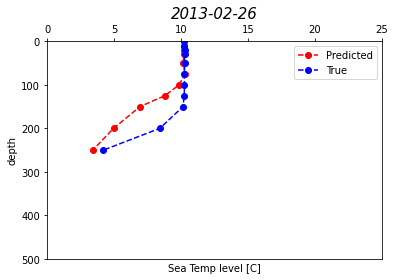

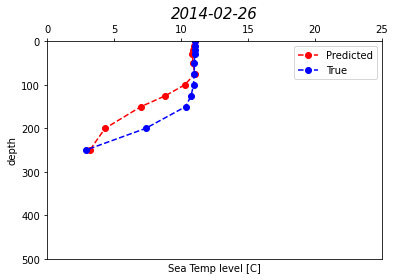

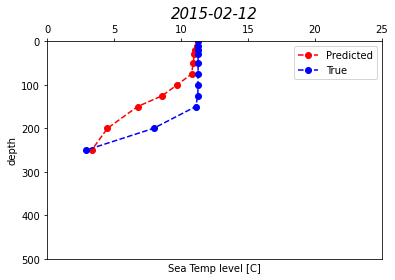

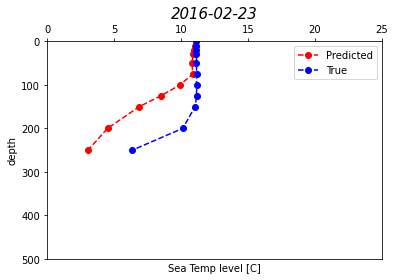

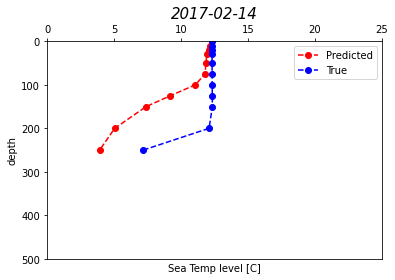

In [38]:
tmp=[]
tmp2=[]
for idx in range(len(X_org)):
        data_df=pd.DataFrame([results_yhat[idx][0]],columns=['10','20','30','50','75','100','125','150','200','250'])
        surface={'0':arr_x_list[idx][0]}
        temp_df=pd.DataFrame()
        temp_df=temp_df.append(surface, ignore_index=True)
        data_df=pd.concat([temp_df,data_df], axis=1)
        df=pd.DataFrame(data_df)
        for index, row in df.iterrows():
            tmp.append(row['0'])
            tmp.append(row['10'])
            tmp.append(row['20'])
            tmp.append(row['30'])
            tmp.append(row['50'])
            tmp.append(row['75'])
            tmp.append(row['100'])
            tmp.append(row['125'])
            tmp.append(row['150'])
            tmp.append(row['200'])
            tmp.append(row['250'])
    
            tmp2.append(arr_org_x_list[idx][0])
            tmp2.append(arr_org_list[idx][0])
            tmp2.append(arr_org_list[idx][1])
            tmp2.append(arr_org_list[idx][2])
            tmp2.append(arr_org_list[idx][3])
            tmp2.append(arr_org_list[idx][4])
            tmp2.append(arr_org_list[idx][5])
            tmp2.append(arr_org_list[idx][6])
            tmp2.append(arr_org_list[idx][7])
            tmp2.append(arr_org_list[idx][8])
            tmp2.append(arr_org_list[idx][9])
    
            Depth  = [0, 10,  20,  30,  50, 75, 100, 125, 150, 200, 250 ]
            fig = plt.figure()
            plt.title(X_Date['DATE'].iloc[idx],fontsize=15, fontstyle='italic',color='Black')
            ax = fig.add_subplot(111)
            ax.plot(tmp, Depth, 'ro--')
            ax.plot(tmp2, Depth, 'bo--')
            ax.xaxis.tick_top()
            ax.set_ylabel('depth')
            ax.set_ylim(500, 0)
            ax.set_xlim(0, 25)
            ax.set_xlabel('Sea Temp level [C]')
            ax.figure.legend(['Predicted','True'],bbox_to_anchor=(1,1),bbox_transform=ax.transAxes)
            plt.show()
            tmp=[]
            tmp2=[]

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-l

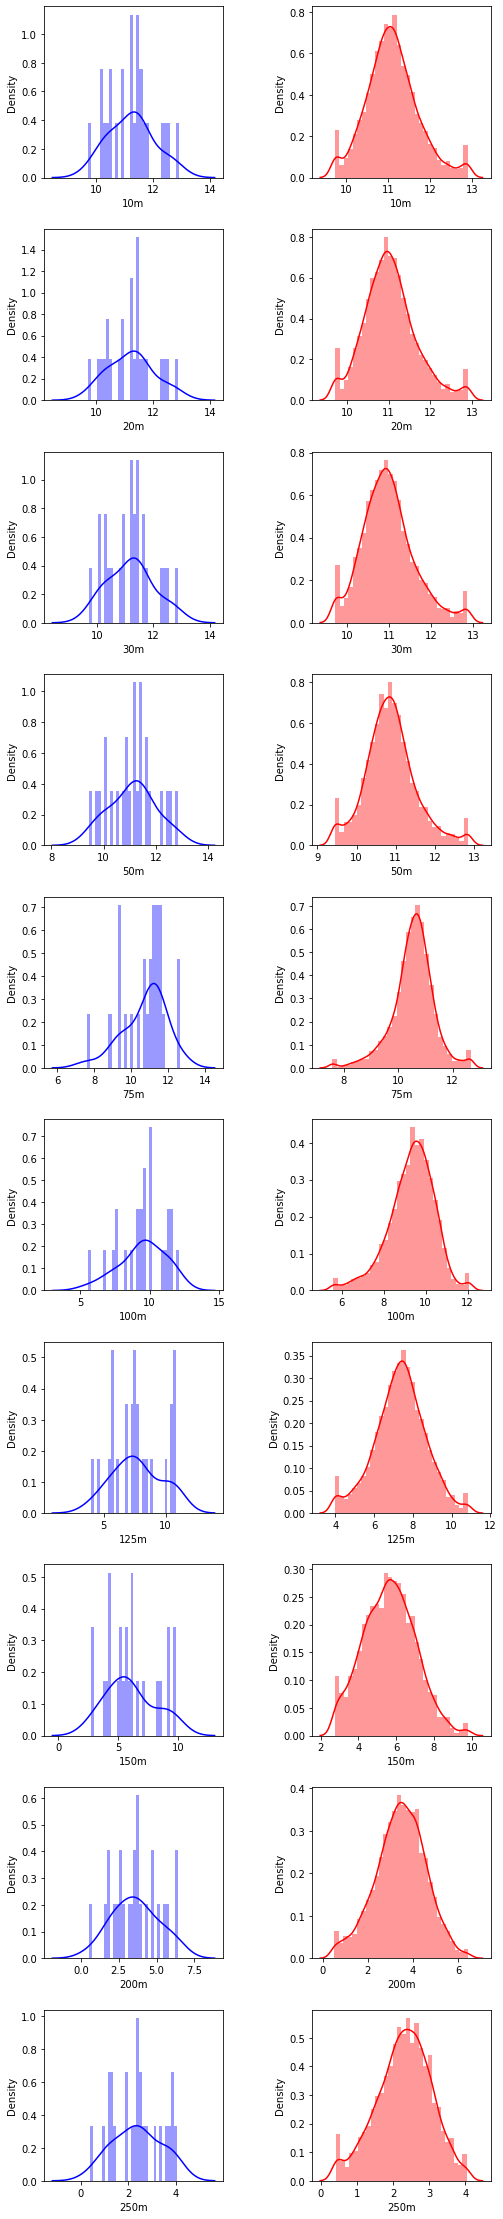

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

index=0
f,axes=plt.subplots(10,2, figsize=(8,40))
plt.subplots_adjust(hspace = 0.3,wspace=0.5)
for depth in ['10','20','30','50','75','100','125','150','200','250']:
    #reshape_ocean_df_1965_FEB[[depth]].hist(bins=50,grid=False, xlabelsize=12, ylabelsize=12)
    #plt.xlabel("Temperature (C)", fontsize=15)
    #plt.ylabel("Frequency",fontsize=15)
    #plt.title('Orignial Dataset Depth:'+depth+'m')
    ax=sns.distplot(hycom_reanal_FEB[depth],bins=30,kde=True,ax=axes[index,0],axlabel=depth+'m',color='b')
    #plt.title('Model Dataset Depth:'+depth+'m')
    ax=sns.distplot(hycom_model_output_df_FEB[depth],bins=30,kde=True, ax=axes[index, 1],color='r',axlabel=depth+'m')
    #sns.distplot(reshape_ocean_df_1965_FEB[depth],bins=30,kde=False,ax=axes[index,0])
    #sns.distplot(model_output_df_FEB[depth],bins=30,kde=False, ax=axes[index,1])
    #plt.show()
    index=index+1;
    #sns.distplot(reshape_ocean_df_1965_FEB[depth], kde=False, color='red', bins=30)
    #create seaborn barplot
    

## HYCOM+OBEERVATION

In [94]:
reshape_ocean_df=pd.read_csv('/gpu_deep/Deep_Ocean/reshape_ocean_df.csv')

In [95]:
reshape_ocean_df

,DATE,Station-Point,Latitude,Longitude,0,10,20,30,50,75,100,125,150,200,250,300,400,500,SSH
0,NaN,NaN,37.0567,130.0,11.6200,11.6200,11.6100,11.7100,11.6000,11.7000,11.6500,11.6500,10.7900,10.8000,5.4000,1.9300,1.5300,1.0400,0.5571
1,1993-04-16,104-07,37.0567,130.0,13.3900,12.7900,12.4400,12.1200,11.0000,7.8500,4.7000,3.2100,2.1100,1.5300,1.2700,1.2400,0.9900,0.8000,0.5627
2,1993-06-02,104-07,37.0567,130.0,18.9100,18.4000,15.2100,11.6900,8.6500,5.8800,4.5600,2.3200,1.7200,1.3100,1.1000,0.9800,0.8200,0.7500,0.5553
3,1993-08-17,104-07,37.0567,130.0,20.2800,18.8200,17.3900,13.9500,7.7100,5.2500,3.6500,2.9000,2.2700,1.4600,1.4600,1.1700,0.8000,0.6200,0.4027
4,1993-10-27,104-07,37.0567,130.0,18.5500,18.4000,18.3500,18.2900,17.3000,16.0900,11.7200,10.5700,9.4500,5.6100,3.0600,1.8100,1.0500,0.8500,0.6760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2333,2017-04-07,107-07,38.2100,130.0,12.4116,12.1538,11.9580,11.8349,11.7170,11.6479,11.2911,10.1389,7.2444,2.6008,1.4623,1.2188,0.9456,0.7695,0.5897
2334,2017-06-18,107-07,38.2100,130.0,18.6714,18.4717,15.6906,15.9700,15.1972,11.3934,8.9937,5.7789,2.2420,1.3188,1.1628,0.9741,0.7597,0.6416,0.5745
2335,2017-08-13,107-07,38.2100,130.0,25.7737,25.6909,18.8682,16.9893,15.4342,15.2041,14.0331,10.0209,5.9578,2.5165,1.4246,1.1840,0.9122,0.7319,0.6942
2336,2017-10-16,107-07,38.2100,130.0,20.6556,20.6614,20.5930,20.5230,19.7756,16.6237,15.2251,12.6926,10.7990,5.8768,2.1434,1.3595,0.9605,0.7680,0.8563


In [96]:
observe_df_FEB=reshape_ocean_df[(reshape_ocean_df["DATE"]>'1993-01-01')&(reshape_ocean_df["DATE"]<'2013-01-01')&(reshape_ocean_df["Station-Point"]=='104-08')&(reshape_ocean_df['DATE'].str.contains("-02-"))]
observe_df_AUG=reshape_ocean_df[(reshape_ocean_df["DATE"]>'1993-01-01')&(reshape_ocean_df["DATE"]<'2013-01-01')&(reshape_ocean_df["Station-Point"]=='104-08')&(reshape_ocean_df['DATE'].str.contains("-08-"))]

In [97]:
observe_df_FEB=observe_df_FEB[['DATE','0','10','20','30','50','75','100','125','150','200','250','SSH']]
observe_df_AUG=observe_df_AUG[['DATE','0','10','20','30','50','75','100','125','150','200','250','SSH']]

In [98]:
observe_df_AUG

,DATE,0,10,20,30,50,75,100,125,150,200,250,SSH
138,1993-08-17,18.8900,18.4100,15.8800,15.7800,6.5000,4.6600,3.0600,2.7000,2.1800,1.6700,1.2900,0.4060
144,1994-08-19,25.7500,25.4800,25.3000,12.9000,9.9600,5.7000,3.3500,2.7000,2.6000,2.5400,1.9000,0.5228
149,1995-08-10,23.2800,22.4600,18.8000,17.0900,15.2500,13.1900,11.5300,10.7700,9.9000,5.1900,2.9300,0.5955
155,1996-08-04,24.3000,21.9500,14.9100,12.0100,7.9500,5.2200,3.5600,2.2800,1.6500,1.0700,0.8000,0.4849
161,1997-08-27,25.3400,25.3100,21.7500,15.8800,11.1200,5.9800,3.5500,2.6500,1.9700,1.2100,0.9800,0.5744
166,1998-08-21,23.7400,21.7100,16.8600,11.7900,7.2100,4.6700,2.8200,1.9000,1.4300,1.0500,0.8500,0.5022
172,1999-08-29,24.2600,24.2100,24.2500,20.5800,16.0300,14.9600,12.3400,10.6100,7.5800,2.1700,1.3200,0.7317
177,2000-08-06,23.1100,19.8500,16.9300,12.9100,11.4700,11.0900,10.8600,10.8200,10.6300,9.1200,4.6400,0.6728
187,2002-08-17,21.9500,21.9200,19.3600,17.3300,15.7500,14.5400,12.4000,11.1900,10.3200,5.7100,2.1100,0.7082
197,2004-08-13,26.7200,22.5200,17.1100,15.6600,14.8700,13.2000,10.2700,7.1800,4.5500,1.6300,1.0500,0.6900


In [99]:
hycom_reanal_AUG

,DATE,0,10,20,30,50,75,100,125,150,200,250,SSH
0,1993-08-16,19.588762,19.080286,16.575882,13.495107,9.451912,6.411451,4.464586,3.205909,2.404172,1.530397,1.130278,-0.002265
1,1994-08-16,26.062735,24.971573,17.528282,13.188915,8.827238,5.510680,3.492363,2.315717,1.641533,1.040166,0.798606,0.055967
2,1995-08-16,23.494307,22.312141,18.463043,15.984201,13.359725,10.410577,7.570468,5.520000,4.086542,2.439729,1.690196,0.110264
3,1996-08-16,25.038660,23.303669,17.809355,13.938215,9.695835,6.324866,4.012743,2.329485,1.504420,1.015100,0.794481,0.034988
4,1997-08-16,24.538824,23.995213,19.620438,14.140278,9.453587,6.350783,4.231370,2.838036,2.005269,1.222092,0.873308,0.054530
5,1998-08-16,24.382837,23.604050,19.690985,16.362053,13.112772,9.476641,6.945117,5.488541,4.492462,3.134596,2.292140,0.121544
6,1999-08-16,23.999249,23.564579,21.987476,19.911556,16.307636,12.777940,10.020271,7.902998,6.203199,3.826232,2.354973,0.240215
7,2000-08-16,25.332102,24.650194,20.694046,17.665010,14.532671,11.443341,8.924777,6.865099,5.208161,2.832699,1.633771,0.179285
8,2001-08-16,26.789858,26.438156,24.399681,19.409536,16.476467,14.016014,11.088679,8.298107,6.195582,3.343056,1.995416,0.276850
9,2002-08-16,23.085157,22.578354,20.603893,18.587059,15.779644,12.176272,9.439334,7.447371,5.842437,3.489025,2.003703,0.220347


In [100]:
hycom_observe_df_FEB=pd.concat([hycom_reanal_FEB,observe_df_FEB])
hycom_observe_df_AUG=pd.concat([hycom_reanal_AUG,observe_df_AUG])

In [101]:
hycom_observe_df_AUG

,DATE,0,10,20,30,50,75,100,125,150,200,250,SSH
0,1993-08-16,19.588762,19.080286,16.575882,13.495107,9.451912,6.411451,4.464586,3.205909,2.404172,1.530397,1.130278,-0.002265
1,1994-08-16,26.062735,24.971573,17.528282,13.188915,8.827238,5.510680,3.492363,2.315717,1.641533,1.040166,0.798606,0.055967
2,1995-08-16,23.494307,22.312141,18.463043,15.984201,13.359725,10.410577,7.570468,5.520000,4.086542,2.439729,1.690196,0.110264
3,1996-08-16,25.038660,23.303669,17.809355,13.938215,9.695835,6.324866,4.012743,2.329485,1.504420,1.015100,0.794481,0.034988
4,1997-08-16,24.538824,23.995213,19.620438,14.140278,9.453587,6.350783,4.231370,2.838036,2.005269,1.222092,0.873308,0.054530
5,1998-08-16,24.382837,23.604050,19.690985,16.362053,13.112772,9.476641,6.945117,5.488541,4.492462,3.134596,2.292140,0.121544
6,1999-08-16,23.999249,23.564579,21.987476,19.911556,16.307636,12.777940,10.020271,7.902998,6.203199,3.826232,2.354973,0.240215
7,2000-08-16,25.332102,24.650194,20.694046,17.665010,14.532671,11.443341,8.924777,6.865099,5.208161,2.832699,1.633771,0.179285
8,2001-08-16,26.789858,26.438156,24.399681,19.409536,16.476467,14.016014,11.088679,8.298107,6.195582,3.343056,1.995416,0.276850
9,2002-08-16,23.085157,22.578354,20.603893,18.587059,15.779644,12.176272,9.439334,7.447371,5.842437,3.489025,2.003703,0.220347


In [102]:
from sdv.tabular import CopulaGAN
from sdv.tabular import GaussianCopula
from sdv.tabular import TVAE
#model_upper = CopulaGAN(constraints=constraints_upper)
#model=CopulaGAN()
#model_upper.fit(ocean_train_upper)
#model.fit(reshape_ocean_df_1965)
#model_upper.sample(100, max_retries=100000, conditions=conditions)
#model_output=model.sample(1000, max_retries=1000000)
#reshape_ocean_df_1965.hist()
#model_output.hist()

#model=CopulaGAN(constraints=constraints_upper3)

model=TVAE()

    
#model=CopulaGAN(constraints=constraints_upper3)
model=TVAE()
for mon in ['FEB','AUG']:
    model.fit(globals()['hycom_observe_df_'+mon])
    model_output=model.sample(2000, max_retries=1000000)
    model_output['10']=np.where((model_output['10']>model_output['0']),model_output['0'],model_output['10'])
    model_output['20']=np.where((model_output['20']>model_output['10']),model_output['10'],model_output['20'])
    model_output['30']=np.where((model_output['30']>model_output['20']),model_output['20'],model_output['30'])
    model_output['50']=np.where((model_output['50']>model_output['30']),model_output['30'],model_output['50'])
    model_output['75']=np.where((model_output['75']>model_output['50']),model_output['50'],model_output['75'])
    model_output['100']=np.where((model_output['100']>model_output['75']),model_output['75'],model_output['100'])
    model_output['125']=np.where((model_output['125']>model_output['100']),model_output['100'],model_output['125'])
    model_output['150']=np.where((model_output['150']>model_output['125']),model_output['125'],model_output['150'])
    model_output['200']=np.where((model_output['200']>model_output['150']),model_output['150'],model_output['200'])
    model_output['250']=np.where((model_output['250']>model_output['200']),model_output['200'],model_output['250'])  
    globals()['model_output_df_'+mon]=model_output
    globals()['temp_tvae_model_output_df_'+mon]=model_output

    
model=GaussianCopula(constraints=constraints_upper3)
for mon in ['FEB','AUG']:
    model.fit(globals()['hycom_observe_df_'+mon])
    model_output=model.sample(2000, max_retries=1000000)
    model_output['10']=np.where((model_output['10']>model_output['0']),model_output['0'],model_output['10'])
    model_output['20']=np.where((model_output['20']>model_output['10']),model_output['10'],model_output['20'])
    model_output['30']=np.where((model_output['30']>model_output['20']),model_output['20'],model_output['30'])
    model_output['50']=np.where((model_output['50']>model_output['30']),model_output['30'],model_output['50'])
    model_output['75']=np.where((model_output['75']>model_output['50']),model_output['50'],model_output['75'])
    model_output['100']=np.where((model_output['100']>model_output['75']),model_output['75'],model_output['100'])
    model_output['125']=np.where((model_output['125']>model_output['100']),model_output['100'],model_output['125'])
    model_output['150']=np.where((model_output['150']>model_output['125']),model_output['125'],model_output['150'])
    model_output['200']=np.where((model_output['200']>model_output['150']),model_output['150'],model_output['200'])
    model_output['250']=np.where((model_output['250']>model_output['200']),model_output['200'],model_output['250'])
    globals()['model_output_df_'+mon]=pd.concat([model_output,pd.DataFrame(globals()['temp_tvae_model_output_df_'+mon])])
    #globals()['model_output_df_'+mon]=model_output    

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuse

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:621: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:5003: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2494: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:4994: RuntimeWarning: divide by zero encou

In [103]:
hycom_observe_model_output_df_FEB=model_output_df_FEB
hycom_observe_model_output_df_AUG=model_output_df_AUG

In [104]:
# get the dataset
def get_hycom_observe_syn_dataset(season):
    #X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
    #X,y=
    if (season=='FEB') : temp=hycom_observe_model_output_df_FEB[(hycom_observe_model_output_df_FEB['DATE'].str.contains("-02-"))]
    elif (season=='APR') : temp=hycom_observe_model_output_df_APR[(hycom_observe_model_output_df_APR['DATE'].str.contains("-04-"))]
    elif (season=='JUN') : temp=hycom_observe_model_output_df_JUN[(hycom_observe_model_output_df_JUN['DATE'].str.contains("-06-"))]
    elif (season=='AUG') : temp=hycom_observe_model_output_df_AUG[(hycom_observe_model_output_df_AUG['DATE'].str.contains("-08-"))]
    elif (season=='OCT') : temp=hycom_observe_model_output_df_OCT[(hycom_observe_model_output_df_OCT['DATE'].str.contains("-10-"))]
    elif (season=='DEC') : temp=hycom_observe_model_output_df_DEC[(hycom_observe_model_output_df_DEC['DATE'].str.contains("-12-"))]            
    #elif (season=='APR'):
    #                     temp=reshape_ocean_df[(reshape_ocean_df['Station-Point']==str(station))&(reshape_ocean_df['DATE'].str.contains("-04-"))]
    
    
    
    X=temp[['0','SSH']]
    y=temp[['10','20','30','50','75','100','125','150','200','250']]
    return X, y

In [105]:
# get the dataset
def get_org_test_dataset(station,season):
    #X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
    #X,y=
    if (season=='FEB') : temp=reshape_ocean_df_test_FEB[(reshape_ocean_df_test_FEB['Station-Point']==station)&(reshape_ocean_df_test_FEB['DATE'].str.contains("-02-"))]
    elif (season=='APR') : temp=reshape_ocean_df_test_APR[(reshape_ocean_df_test_APR['Station-Point']==station)&(reshape_ocean_df_test_APR['DATE'].str.contains("-04-"))]
    elif (season=='JUN') : temp=reshape_ocean_df_test_JUN[(reshape_ocean_df_test_JUN['Station-Point']==station)&(reshape_ocean_df_test_JUN['DATE'].str.contains("-06-"))]
    elif (season=='AUG') : temp=reshape_ocean_df_test_AUG[(reshape_ocean_df_test_AUG['Station-Point']==station)&(reshape_ocean_df_test_AUG['DATE'].str.contains("-08-"))]
    elif (season=='OCT') : temp=reshape_ocean_df_test_OCT[(reshape_ocean_df_test_OCT['Station-Point']==station)&(reshape_ocean_df_test_OCT['DATE'].str.contains("-10-"))]
    elif (season=='DEC') : temp=reshape_ocean_df_test_DEC[(reshape_ocean_df_test_DEC['Station-Point']==station)&(reshape_ocean_df_test_DEC['DATE'].str.contains("-12-"))]            
    #elif (season=='APR'):
    #                     temp=reshape_ocean_df[(reshape_ocean_df['Station-Point']==str(station))&(reshape_ocean_df['DATE'].str.contains("-04-"))]
    
    
    
    X=temp[['0','SSH']]
    y=temp[['10','20','30','50','75','100','125','150','200','250']]
    #y=temp
    return X,y

In [106]:
X_org, y_org=get_org_test_dataset("104-08","FEB")
arr_org_list=y_org.to_numpy()
arr_org_x_list=X_org.to_numpy()

In [107]:
X, y = get_org_test_dataset("104-08","FEB")
arr_x_list=X.to_numpy()
arr_y_list=y.to_numpy()
results_yhat=list()
X

,0,SSH
238,10.2600,0.6743
244,11.0269,0.6590
250,11.2695,0.7248
256,11.1396,0.7152
262,12.3169,0.8325


In [108]:
X, y=get_hycom_observe_syn_dataset('FEB')

In [109]:
X

,0,SSH
4,11.859901,0.160072
6,11.288796,0.039559
7,10.643278,0.135209
11,10.789870,0.148677
12,10.733710,0.658094
...,...,...
1995,10.771121,0.124501
1996,9.758266,0.033799
1997,10.862645,0.005239
1998,11.520357,0.117657


In [110]:
# dataset
#X, y=make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=1)

#define the base models
level0=list()
level0.append(('knn',KNeighborsRegressor()))
level0.append(('rf',RandomForestRegressor()))
level0.append(('svm',SVR()))

#define meta learner model
level1=LinearRegression()
#define the stacking ensemble
cv=RepeatedKFold(n_splits=10,n_repeats=5, random_state=1)
model=MultiOutputRegressor(StackingRegressor(estimators=level0, final_estimator=level1, cv=5))
model.estimator.final_estimator_ = model.estimator.final_estimator
model.fit(X,y)
#scores=cross_val_score(model, X, y,scoring='neg_mean_absolute_error',cv=cv, n_jobs=-1)

MultiOutputRegressor(estimator=StackingRegressor(cv=5,
                                                 estimators=[('knn',
                                                              KNeighborsRegressor()),
                                                             ('rf',
                                                              RandomForestRegressor()),
                                                             ('svm', SVR())],
                                                 final_estimator=LinearRegression()))

In [111]:
X_org, y_org=get_org_test_dataset("104-08","FEB")
arr_org_list=y_org.to_numpy()
arr_org_x_list=X_org.to_numpy()

In [112]:
X, y = get_org_test_dataset("104-08","FEB")
arr_x_list=X.to_numpy()
arr_y_list=y.to_numpy()
results_yhat=list()
X

,0,SSH
238,10.2600,0.6743
244,11.0269,0.6590
250,11.2695,0.7248
256,11.1396,0.7152
262,12.3169,0.8325


In [113]:
import numpy as np
for idx in range(len(X)):
#make a prediction for X-array
    val = [arr_x_list[idx][0], arr_x_list[idx][1]]
    print(val)
    yhat=model.predict([val])
    results_yhat.append(yhat)

[10.26, 0.6743]
[11.0269, 0.659]
[11.2695, 0.7248]
[11.1396, 0.7152000000000001]
[12.3169, 0.8325]


In [114]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
sum_rmse=0
sum_mae=0
for idx in range(len(X_org)):
    #mean_squared_error(arr_org_list[[0]], [results_yhat[idx][0]], squared=False)
    sum_rmse=sum_rmse+mean_squared_error(arr_org_list[[0]], [results_yhat[idx][0]])
    sum_mae=sum_mae+mean_absolute_error(arr_org_list[[0]], [results_yhat[idx][0]])

print('>%s %.3f' % ('RMSE:', sum_rmse/len(X)))
print('>%s %.3f' % ('MAE:', sum_mae/len(X)))

>RMSE: 6.315
>MAE: 1.823


In [115]:
A=mean_squared_error(arr_org_list[[0]], yhat)**0.5
B=mean_squared_error(arr_org_list[[1]], yhat)**0.5
C=mean_squared_error(arr_org_list[[2]], yhat)**0.5
D=mean_squared_error(arr_org_list[[3]], yhat)**0.5
E=mean_squared_error(arr_org_list[[4]], yhat)**0.5

In [116]:
print((A+B+C+D+E)/5)

3.1291102843093164


In [117]:
A=mean_absolute_error(arr_org_list[[0]], yhat)
B=mean_absolute_error(arr_org_list[[1]], yhat)
C=mean_absolute_error(arr_org_list[[2]], yhat)
D=mean_absolute_error(arr_org_list[[3]], yhat)
E=mean_absolute_error(arr_org_list[[4]], yhat)

In [118]:
print((A+B+C+D+E)/5)

2.3294418465836375


In [119]:
from sklearn.metrics import mean_absolute_error
sum_rmse=0
sum_mae=0
for idx in range(len(X_org)):
    #mean_squared_error(arr_org_list[[0]], [results_yhat[idx][0]], squared=False)
    sum_rmse=sum_rmse+mean_squared_error(arr_org_list[[0]], [results_yhat[idx][0]], squared=True)
    sum_mae=sum_mae+mean_absolute_error(arr_org_list[[0]], [results_yhat[idx][0]])

print('>%s %.3f' % ('RMSE:', sum_rmse/len(X)))
print('>%s %.3f' % ('MAE:', sum_mae/len(X)))

>RMSE: 6.315
>MAE: 1.823


In [120]:
from sklearn.metrics import mean_absolute_error
sum_rmse=0
sum_mae=0
for idx in range(len(X_org)):
    #mean_squared_error(arr_org_list[[0]], [results_yhat[idx][0]], squared=False)
    sum_rmse=sum_rmse+mean_squared_error(arr_org_list[[0]], [results_yhat[idx][0]], squared=True)
    sum_mae=sum_mae+mean_absolute_error(arr_org_list[[0]], [results_yhat[idx][0]])

print('>%s %.3f' % ('RMSE:', sum_rmse/len(X)))
print('>%s %.3f' % ('MAE:', sum_mae/len(X)))

>RMSE: 6.315
>MAE: 1.823


In [121]:
X_Date=get_date_test_dataset('104-08','FEB')
X_Date['DATE'].iloc[0]

'2013-02-26'

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/ipykernel_launcher.py:38: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


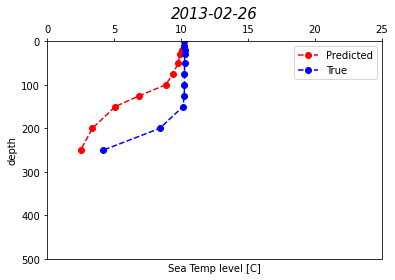

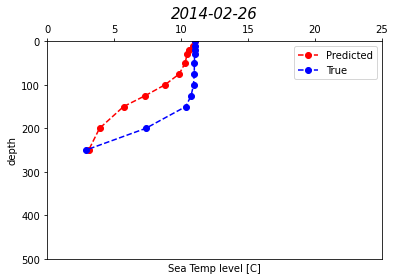

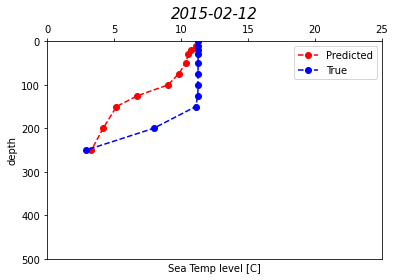

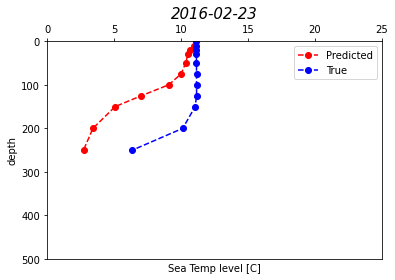

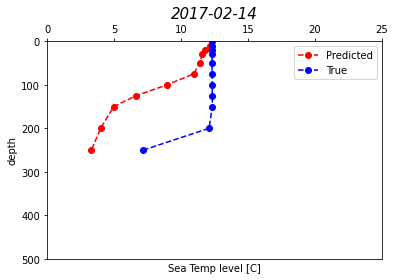

In [122]:
tmp=[]
tmp2=[]
for idx in range(len(X_org)):
        data_df=pd.DataFrame([results_yhat[idx][0]],columns=['10','20','30','50','75','100','125','150','200','250'])
        surface={'0':arr_x_list[idx][0]}
        temp_df=pd.DataFrame()
        temp_df=temp_df.append(surface, ignore_index=True)
        data_df=pd.concat([temp_df,data_df], axis=1)
        df=pd.DataFrame(data_df)
        for index, row in df.iterrows():
            tmp.append(row['0'])
            tmp.append(row['10'])
            tmp.append(row['20'])
            tmp.append(row['30'])
            tmp.append(row['50'])
            tmp.append(row['75'])
            tmp.append(row['100'])
            tmp.append(row['125'])
            tmp.append(row['150'])
            tmp.append(row['200'])
            tmp.append(row['250'])
    
            tmp2.append(arr_org_x_list[idx][0])
            tmp2.append(arr_org_list[idx][0])
            tmp2.append(arr_org_list[idx][1])
            tmp2.append(arr_org_list[idx][2])
            tmp2.append(arr_org_list[idx][3])
            tmp2.append(arr_org_list[idx][4])
            tmp2.append(arr_org_list[idx][5])
            tmp2.append(arr_org_list[idx][6])
            tmp2.append(arr_org_list[idx][7])
            tmp2.append(arr_org_list[idx][8])
            tmp2.append(arr_org_list[idx][9])
    
            Depth  = [0, 10,  20,  30,  50, 75, 100, 125, 150, 200, 250 ]
            fig = plt.figure()
            plt.title(X_Date['DATE'].iloc[idx],fontsize=15, fontstyle='italic',color='Black')
            ax = fig.add_subplot(111)
            ax.plot(tmp, Depth, 'ro--')
            ax.plot(tmp2, Depth, 'bo--')
            ax.xaxis.tick_top()
            ax.set_ylabel('depth')
            ax.set_ylim(500, 0)
            ax.set_xlim(0, 25)
            ax.set_xlabel('Sea Temp level [C]')
            ax.figure.legend(['Predicted','True'],bbox_to_anchor=(1,1),bbox_transform=ax.transAxes)
            plt.show()
            tmp=[]
            tmp2=[]

## ROMS 

In [155]:
roms_df_FEB=pd.read_csv('/gpu_deep/Deep_Ocean/roms_df_FEB.csv')
roms_df_AUG=pd.read_csv('/gpu_deep/Deep_Ocean/roms_df_AUG.csv')

In [156]:
roms_df_FEB=roms_df_FEB[['DATE','SSH','0','10','20','30','50','75','100','125','150','200','250']]
roms_df_AUG=roms_df_AUG[['DATE','SSH','0','10','20','30','50','75','100','125','150','200','250']]

In [157]:
roms_df_AUG

,DATE,SSH,0,10,20,30,50,75,100,125,150,200,250
0,1993-08-16,0.186597,24.988302,24.806519,23.339127,22.149080,20.211048,18.892653,18.393858,17.964066,17.587294,17.248522,16.647905
1,1994-08-16,0.242935,28.340473,28.039574,27.131069,26.365812,24.675343,22.655085,21.712067,20.853901,20.085512,19.399450,18.238310
2,1995-08-16,0.181455,26.713139,25.964838,23.297266,22.017021,20.106812,18.896885,18.435032,18.038397,17.691597,17.384958,16.858738
3,1996-08-16,0.230360,28.683996,28.248034,26.393557,25.042805,22.471228,20.286160,19.403299,18.663717,18.048595,17.534098,16.724764
4,1997-08-16,0.225539,26.441713,26.217279,25.480291,24.813684,23.258970,21.583786,20.868273,20.256323,19.735624,19.283976,18.521393
5,1998-08-16,0.194514,26.879555,26.419559,24.663996,23.720219,22.252394,21.136600,20.659470,20.222084,19.812660,19.428316,18.720564
6,1999-08-16,0.209870,25.588566,25.555035,25.024429,24.476625,22.975664,21.592525,21.009180,20.496355,20.045185,19.637316,18.904387
7,2000-08-16,0.194239,27.962549,27.695980,26.440218,25.312429,23.065260,21.234978,20.509083,19.889656,19.355963,18.890705,18.113533
8,2001-08-16,0.287710,28.391378,27.882288,27.018354,26.265533,24.499077,22.760332,22.060078,21.463787,20.943634,20.481308,19.669249
9,2002-08-16,0.265373,25.440331,24.998304,24.110374,23.534809,22.146858,20.830641,20.288988,19.844172,19.463514,19.126251,18.534672


In [158]:
from sdv.tabular import CopulaGAN
from sdv.tabular import GaussianCopula
from sdv.tabular import TVAE
#model_upper = CopulaGAN(constraints=constraints_upper)
#model=CopulaGAN()
#model_upper.fit(ocean_train_upper)
#model.fit(reshape_ocean_df_1965)
#model_upper.sample(100, max_retries=100000, conditions=conditions)
#model_output=model.sample(1000, max_retries=1000000)
#reshape_ocean_df_1965.hist()
#model_output.hist()

#model=CopulaGAN(constraints=constraints_upper3)

model=TVAE()

    
#model=CopulaGAN(constraints=constraints_upper3)
model=TVAE()
for mon in ['FEB','AUG']:
    model.fit(globals()['roms_df_'+mon])
    model_output=model.sample(2000, max_retries=1000000)
    model_output['10']=np.where((model_output['10']>model_output['0']),model_output['0'],model_output['10'])
    model_output['20']=np.where((model_output['20']>model_output['10']),model_output['10'],model_output['20'])
    model_output['30']=np.where((model_output['30']>model_output['20']),model_output['20'],model_output['30'])
    model_output['50']=np.where((model_output['50']>model_output['30']),model_output['30'],model_output['50'])
    model_output['75']=np.where((model_output['75']>model_output['50']),model_output['50'],model_output['75'])
    model_output['100']=np.where((model_output['100']>model_output['75']),model_output['75'],model_output['100'])
    model_output['125']=np.where((model_output['125']>model_output['100']),model_output['100'],model_output['125'])
    model_output['150']=np.where((model_output['150']>model_output['125']),model_output['125'],model_output['150'])
    model_output['200']=np.where((model_output['200']>model_output['150']),model_output['150'],model_output['200'])
    model_output['250']=np.where((model_output['250']>model_output['200']),model_output['200'],model_output['250'])  
    globals()['model_output_df_'+mon]=model_output
    globals()['temp_tvae_model_output_df_'+mon]=model_output

    
model=GaussianCopula(constraints=constraints_upper3)
for mon in ['FEB','AUG']:
    model.fit(globals()['roms_df_'+mon])
    model_output=model.sample(2000, max_retries=1000000)
    model_output['10']=np.where((model_output['10']>model_output['0']),model_output['0'],model_output['10'])
    model_output['20']=np.where((model_output['20']>model_output['10']),model_output['10'],model_output['20'])
    model_output['30']=np.where((model_output['30']>model_output['20']),model_output['20'],model_output['30'])
    model_output['50']=np.where((model_output['50']>model_output['30']),model_output['30'],model_output['50'])
    model_output['75']=np.where((model_output['75']>model_output['50']),model_output['50'],model_output['75'])
    model_output['100']=np.where((model_output['100']>model_output['75']),model_output['75'],model_output['100'])
    model_output['125']=np.where((model_output['125']>model_output['100']),model_output['100'],model_output['125'])
    model_output['150']=np.where((model_output['150']>model_output['125']),model_output['125'],model_output['150'])
    model_output['200']=np.where((model_output['200']>model_output['150']),model_output['150'],model_output['200'])
    model_output['250']=np.where((model_output['250']>model_output['200']),model_output['200'],model_output['250'])
    globals()['model_output_df_'+mon]=pd.concat([model_output,pd.DataFrame(globals()['temp_tvae_model_output_df_'+mon])])
    #globals()['model_output_df_'+mon]=model_output    

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuse

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:621: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


In [159]:
roms_model_output_df_FEB=model_output_df_FEB
roms_model_output_df_AUG=model_output_df_AUG

In [160]:
roms_model_output_df_FEB

,DATE,SSH,0,10,20,30,50,75,100,125,150,200,250
0,1999-02-15,0.043336,12.024827,12.020294,11.999005,11.981075,11.933205,11.884150,11.884150,11.884150,11.884150,11.884150,11.884150
1,2007-02-15,0.057987,12.066431,12.049236,12.037207,12.029131,11.993605,11.956083,11.940638,11.927958,11.914643,11.664242,11.632844
3,2014-02-15,0.086431,13.485424,13.473146,13.450915,13.429990,13.378673,13.313065,13.292823,13.261737,13.241498,13.038741,12.993437
5,2005-02-15,0.043336,12.279938,12.279100,12.266930,12.255227,12.214820,12.160849,12.147051,12.118106,12.091629,12.091629,12.091629
6,1994-02-15,0.060795,12.178563,12.174816,12.151740,12.131452,12.074557,12.010836,12.007794,11.967542,11.939840,11.712356,11.656847
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2013-02-15,0.093854,12.299715,12.299715,12.246400,12.246400,12.246400,12.246400,12.246400,12.246400,12.246400,12.246400,12.246400
1996,2017-02-15,0.093385,12.645031,12.300875,12.300875,12.300875,12.300875,12.300875,12.300875,12.300875,12.300875,12.300875,12.300875
1997,1995-02-15,0.148206,12.855263,12.639245,12.591619,12.591619,12.591619,12.591619,12.591619,12.591619,12.591619,12.351451,12.351451
1998,2017-02-15,0.075006,12.505856,12.447151,12.447151,12.375802,12.375802,12.375802,12.055186,12.055186,12.055186,12.055186,12.055186


In [161]:
roms_model_output_df_AUG

,DATE,SSH,0,10,20,30,50,75,100,125,150,200,250
0,1996-08-16,0.224058,29.239874,28.505587,26.455376,25.183560,23.064731,21.053632,20.170671,19.406941,18.517760,17.797236,16.727238
1,2016-08-16,0.265256,29.322154,28.539091,27.155204,25.735820,23.350482,21.549388,20.843910,20.273578,19.888216,19.425063,18.631746
2,2001-08-16,0.211818,26.248521,25.405667,23.190180,21.828764,20.700282,19.735534,19.293170,18.946600,18.463067,18.313030,17.916918
3,2016-08-16,0.259320,29.342086,28.501061,25.975093,24.883987,23.070138,21.314193,20.526950,19.880550,19.450039,18.921028,18.035118
4,1993-08-16,0.274146,25.220395,24.941688,24.546090,23.518087,21.082409,19.221642,18.522507,17.967567,17.742825,17.287745,16.646160
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996-08-16,0.239480,28.903677,27.282361,26.285250,24.381182,22.949211,21.236272,20.168063,18.935865,18.935865,18.935865,17.144785
1996,1996-08-16,0.234957,28.143861,28.136256,26.157102,24.185326,22.551180,20.988659,19.309505,19.309505,17.924669,17.814063,17.811284
1997,2016-08-16,0.235763,27.328467,27.192341,25.887906,24.542549,22.271092,21.374948,19.782577,19.782577,18.810802,18.810802,16.856750
1998,1996-08-16,0.193781,26.721543,26.721543,25.184025,23.902947,22.157835,20.622041,20.043435,18.398606,18.398606,17.446748,17.136019


In [162]:
# get the dataset
def get_roms_syn_dataset(season):
    #X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
    #X,y=
    if (season=='FEB') : temp=roms_model_output_df_FEB[(roms_model_output_df_FEB['DATE'].str.contains("-02-"))]
    elif (season=='APR') : temp=roms_model_output_df_APR[(roms_model_output_df_APR['DATE'].str.contains("-04-"))]
    elif (season=='JUN') : temp=roms_model_output_df_JUN[(roms_model_output_df_JUN['DATE'].str.contains("-06-"))]
    elif (season=='AUG') : temp=roms_model_output_df_AUG[(roms_model_output_df_AUG['DATE'].str.contains("-08-"))]
    elif (season=='OCT') : temp=roms_model_output_df_OCT[(roms_model_output_df_OCT['DATE'].str.contains("-10-"))]
    elif (season=='DEC') : temp=roms_model_output_df_DEC[(roms_model_output_df_DEC['DATE'].str.contains("-12-"))]            
    #elif (season=='APR'):
    #                     temp=reshape_ocean_df[(reshape_ocean_df['Station-Point']==str(station))&(reshape_ocean_df['DATE'].str.contains("-04-"))]
    
    
    
    X=temp[['0','SSH']]
    y=temp[['10','20','30','50','75','100','125','150','200','250']]
    return X, y

In [163]:
# get the dataset
def get_org_test_dataset(station,season):
    #X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
    #X,y=
    if (season=='FEB') : temp=reshape_ocean_df_test_FEB[(reshape_ocean_df_test_FEB['Station-Point']==station)&(reshape_ocean_df_test_FEB['DATE'].str.contains("-02-"))]
    elif (season=='APR') : temp=reshape_ocean_df_test_APR[(reshape_ocean_df_test_APR['Station-Point']==station)&(reshape_ocean_df_test_APR['DATE'].str.contains("-04-"))]
    elif (season=='JUN') : temp=reshape_ocean_df_test_JUN[(reshape_ocean_df_test_JUN['Station-Point']==station)&(reshape_ocean_df_test_JUN['DATE'].str.contains("-06-"))]
    elif (season=='AUG') : temp=reshape_ocean_df_test_AUG[(reshape_ocean_df_test_AUG['Station-Point']==station)&(reshape_ocean_df_test_AUG['DATE'].str.contains("-08-"))]
    elif (season=='OCT') : temp=reshape_ocean_df_test_OCT[(reshape_ocean_df_test_OCT['Station-Point']==station)&(reshape_ocean_df_test_OCT['DATE'].str.contains("-10-"))]
    elif (season=='DEC') : temp=reshape_ocean_df_test_DEC[(reshape_ocean_df_test_DEC['Station-Point']==station)&(reshape_ocean_df_test_DEC['DATE'].str.contains("-12-"))]            
    #elif (season=='APR'):
    #                     temp=reshape_ocean_df[(reshape_ocean_df['Station-Point']==str(station))&(reshape_ocean_df['DATE'].str.contains("-04-"))]
    
    
    
    X=temp[['0','SSH']]
    y=temp[['10','20','30','50','75','100','125','150','200','250']]
    #y=temp
    return X,y

In [164]:
X, y=get_roms_syn_dataset('FEB')

In [165]:
X

,0,SSH
0,12.024827,0.043336
1,12.066431,0.057987
3,13.485424,0.086431
5,12.279938,0.043336
6,12.178563,0.060795
...,...,...
1995,12.299715,0.093854
1996,12.645031,0.093385
1997,12.855263,0.148206
1998,12.505856,0.075006


In [166]:
# dataset
#X, y=make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=1)

#define the base models
level0=list()
level0.append(('knn',KNeighborsRegressor()))
level0.append(('rf',RandomForestRegressor()))
level0.append(('svm',SVR()))

#define meta learner model
level1=LinearRegression()
#define the stacking ensemble
cv=RepeatedKFold(n_splits=10,n_repeats=5, random_state=1)
model=MultiOutputRegressor(StackingRegressor(estimators=level0, final_estimator=level1, cv=5))
model.estimator.final_estimator_ = model.estimator.final_estimator
model.fit(X,y)
#scores=cross_val_score(model, X, y,scoring='neg_mean_absolute_error',cv=cv, n_jobs=-1)

MultiOutputRegressor(estimator=StackingRegressor(cv=5,
                                                 estimators=[('knn',
                                                              KNeighborsRegressor()),
                                                             ('rf',
                                                              RandomForestRegressor()),
                                                             ('svm', SVR())],
                                                 final_estimator=LinearRegression()))

In [167]:
X_org, y_org=get_org_test_dataset("104-08","FEB")
arr_org_list=y_org.to_numpy()
arr_org_x_list=X_org.to_numpy()

In [168]:
X, y = get_org_test_dataset("104-08","FEB")
arr_x_list=X.to_numpy()
arr_y_list=y.to_numpy()
results_yhat=list()
X

,0,SSH
238,10.2600,0.6743
244,11.0269,0.6590
250,11.2695,0.7248
256,11.1396,0.7152
262,12.3169,0.8325


In [169]:
import numpy as np
for idx in range(len(X)):
#make a prediction for X-array
    val = [arr_x_list[idx][0], arr_x_list[idx][1]]
    print(val)
    yhat=model.predict([val])
    results_yhat.append(yhat)

[10.26, 0.6743]
[11.0269, 0.659]
[11.2695, 0.7248]
[11.1396, 0.7152000000000001]
[12.3169, 0.8325]


In [170]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
sum_rmse=0
sum_mae=0
for idx in range(len(X_org)):
    #mean_squared_error(arr_org_list[[0]], [results_yhat[idx][0]], squared=False)
    sum_rmse=sum_rmse+mean_squared_error(arr_org_list[[0]], [results_yhat[idx][0]])
    sum_mae=sum_mae+mean_absolute_error(arr_org_list[[0]], [results_yhat[idx][0]])

print('>%s %.3f' % ('RMSE:', sum_rmse/len(X)))
print('>%s %.3f' % ('MAE:', sum_mae/len(X)))

>RMSE: 6.520
>MAE: 1.788


In [171]:
A=mean_squared_error(arr_org_list[[0]], yhat)**0.5
B=mean_squared_error(arr_org_list[[1]], yhat)**0.5
C=mean_squared_error(arr_org_list[[2]], yhat)**0.5
D=mean_squared_error(arr_org_list[[3]], yhat)**0.5
E=mean_squared_error(arr_org_list[[4]], yhat)**0.5

In [172]:
print((A+B+C+D+E)/5)

2.7419618779972312


In [173]:
A=mean_absolute_error(arr_org_list[[0]], yhat)
B=mean_absolute_error(arr_org_list[[1]], yhat)
C=mean_absolute_error(arr_org_list[[2]], yhat)
D=mean_absolute_error(arr_org_list[[3]], yhat)
E=mean_absolute_error(arr_org_list[[4]], yhat)

In [174]:
print((A+B+C+D+E)/5)

1.9003932552119855


In [175]:
from sklearn.metrics import mean_absolute_error
sum_rmse=0
sum_mae=0
for idx in range(len(X_org)):
    #mean_squared_error(arr_org_list[[0]], [results_yhat[idx][0]], squared=False)
    sum_rmse=sum_rmse+mean_squared_error(arr_org_list[[0]], [results_yhat[idx][0]], squared=True)
    sum_mae=sum_mae+mean_absolute_error(arr_org_list[[0]], [results_yhat[idx][0]])

print('>%s %.3f' % ('RMSE:', sum_rmse/len(X)))
print('>%s %.3f' % ('MAE:', sum_mae/len(X)))

>RMSE: 6.520
>MAE: 1.788


In [176]:
X_Date=get_date_test_dataset('104-08','FEB')
X_Date['DATE'].iloc[0]

'2013-02-26'

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/ipykernel_launcher.py:38: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


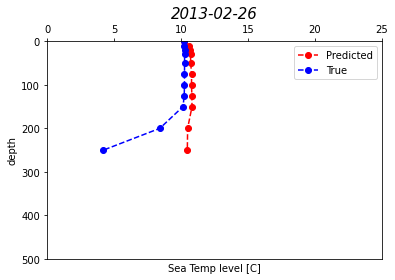

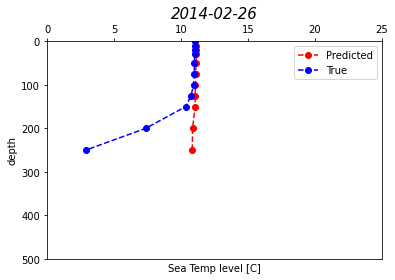

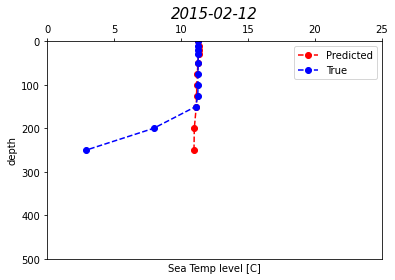

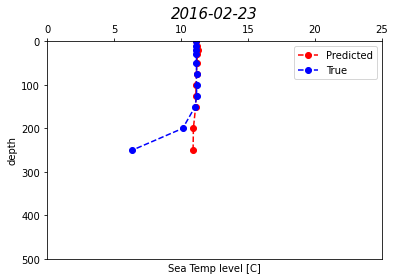

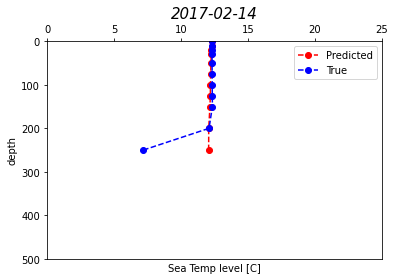

In [177]:
tmp=[]
tmp2=[]
for idx in range(len(X_org)):
        data_df=pd.DataFrame([results_yhat[idx][0]],columns=['10','20','30','50','75','100','125','150','200','250'])
        surface={'0':arr_x_list[idx][0]}
        temp_df=pd.DataFrame()
        temp_df=temp_df.append(surface, ignore_index=True)
        data_df=pd.concat([temp_df,data_df], axis=1)
        df=pd.DataFrame(data_df)
        for index, row in df.iterrows():
            tmp.append(row['0'])
            tmp.append(row['10'])
            tmp.append(row['20'])
            tmp.append(row['30'])
            tmp.append(row['50'])
            tmp.append(row['75'])
            tmp.append(row['100'])
            tmp.append(row['125'])
            tmp.append(row['150'])
            tmp.append(row['200'])
            tmp.append(row['250'])
    
            tmp2.append(arr_org_x_list[idx][0])
            tmp2.append(arr_org_list[idx][0])
            tmp2.append(arr_org_list[idx][1])
            tmp2.append(arr_org_list[idx][2])
            tmp2.append(arr_org_list[idx][3])
            tmp2.append(arr_org_list[idx][4])
            tmp2.append(arr_org_list[idx][5])
            tmp2.append(arr_org_list[idx][6])
            tmp2.append(arr_org_list[idx][7])
            tmp2.append(arr_org_list[idx][8])
            tmp2.append(arr_org_list[idx][9])
    
            Depth  = [0, 10,  20,  30,  50, 75, 100, 125, 150, 200, 250 ]
            fig = plt.figure()
            plt.title(X_Date['DATE'].iloc[idx],fontsize=15, fontstyle='italic',color='Black')
            ax = fig.add_subplot(111)
            ax.plot(tmp, Depth, 'ro--')
            ax.plot(tmp2, Depth, 'bo--')
            ax.xaxis.tick_top()
            ax.set_ylabel('depth')
            ax.set_ylim(500, 0)
            ax.set_xlim(0, 25)
            ax.set_xlabel('Sea Temp level [C]')
            ax.figure.legend(['Predicted','True'],bbox_to_anchor=(1,1),bbox_transform=ax.transAxes)
            plt.show()
            tmp=[]
            tmp2=[]

In [178]:
X, y=get_roms_syn_dataset('AUG')

In [179]:
# dataset
#X, y=make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=1)

#define the base models
level0=list()
level0.append(('knn',KNeighborsRegressor()))
level0.append(('rf',RandomForestRegressor()))
level0.append(('svm',SVR()))

#define meta learner model
level1=LinearRegression()
#define the stacking ensemble
cv=RepeatedKFold(n_splits=10,n_repeats=5, random_state=1)
model=MultiOutputRegressor(StackingRegressor(estimators=level0, final_estimator=level1, cv=5))
model.estimator.final_estimator_ = model.estimator.final_estimator
model.fit(X,y)
#scores=cross_val_score(model, X, y,scoring='neg_mean_absolute_error',cv=cv, n_jobs=-1)

MultiOutputRegressor(estimator=StackingRegressor(cv=5,
                                                 estimators=[('knn',
                                                              KNeighborsRegressor()),
                                                             ('rf',
                                                              RandomForestRegressor()),
                                                             ('svm', SVR())],
                                                 final_estimator=LinearRegression()))

In [180]:
X_org, y_org=get_org_test_dataset("104-08","AUG")
arr_org_list=y_org.to_numpy()
arr_org_x_list=X_org.to_numpy()

In [181]:
X, y = get_org_test_dataset("104-08","AUG")
arr_x_list=X.to_numpy()
arr_y_list=y.to_numpy()
results_yhat=list()
X

,0,SSH
241,25.6300,0.7490
247,23.0684,0.7889
253,25.3693,0.8638
259,29.0423,0.8165
265,25.7603,0.7079


In [182]:
import numpy as np
for idx in range(len(X)):
#make a prediction for X-array
    val = [arr_x_list[idx][0], arr_x_list[idx][1]]
    print(val)
    yhat=model.predict([val])
    results_yhat.append(yhat)

[25.63, 0.7490000000000001]
[23.0684, 0.7889]
[25.3693, 0.8638]
[29.0423, 0.8165]
[25.7603, 0.7079000000000001]


In [183]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
sum_rmse=0
sum_mae=0
for idx in range(len(X_org)):
    #mean_squared_error(arr_org_list[[0]], [results_yhat[idx][0]], squared=False)
    sum_rmse=sum_rmse+mean_squared_error(arr_org_list[[0]], [results_yhat[idx][0]])
    sum_mae=sum_mae+mean_absolute_error(arr_org_list[[0]], [results_yhat[idx][0]])

print('>%s %.3f' % ('RMSE:', sum_rmse/len(X)))
print('>%s %.3f' % ('MAE:', sum_mae/len(X)))

>RMSE: 87.065
>MAE: 8.473


In [184]:
A=mean_squared_error(arr_org_list[[0]], yhat)**0.5
B=mean_squared_error(arr_org_list[[1]], yhat)**0.5
C=mean_squared_error(arr_org_list[[2]], yhat)**0.5
D=mean_squared_error(arr_org_list[[3]], yhat)**0.5
E=mean_squared_error(arr_org_list[[4]], yhat)**0.5

In [185]:
print((A+B+C+D+E)/5)

8.832797512896594


In [186]:
A=mean_absolute_error(arr_org_list[[0]], yhat)
B=mean_absolute_error(arr_org_list[[1]], yhat)
C=mean_absolute_error(arr_org_list[[2]], yhat)
D=mean_absolute_error(arr_org_list[[3]], yhat)
E=mean_absolute_error(arr_org_list[[4]], yhat)

In [187]:
print((A+B+C+D+E)/5)

7.972373528438416


In [188]:
from sklearn.metrics import mean_absolute_error
sum_rmse=0
sum_mae=0
for idx in range(len(X_org)):
    #mean_squared_error(arr_org_list[[0]], [results_yhat[idx][0]], squared=False)
    sum_rmse=sum_rmse+mean_squared_error(arr_org_list[[0]], [results_yhat[idx][0]], squared=True)
    sum_mae=sum_mae+mean_absolute_error(arr_org_list[[0]], [results_yhat[idx][0]])

print('>%s %.3f' % ('RMSE:', sum_rmse/len(X)))
print('>%s %.3f' % ('MAE:', sum_mae/len(X)))

>RMSE: 87.065
>MAE: 8.473


In [189]:
X_Date=get_date_test_dataset('104-08','AUG')
X_Date['DATE'].iloc[0]

'2013-08-21'

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/ipykernel_launcher.py:38: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


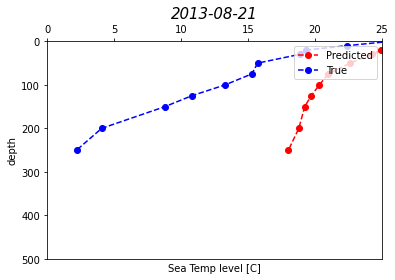

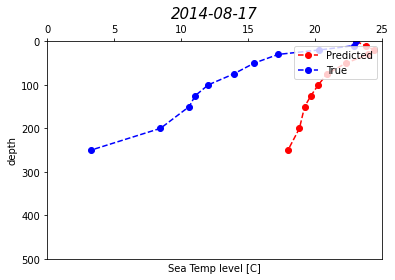

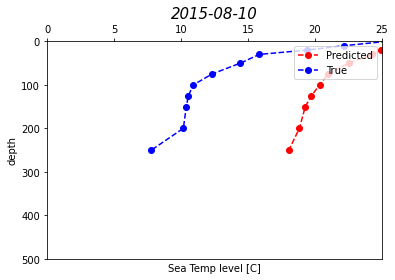

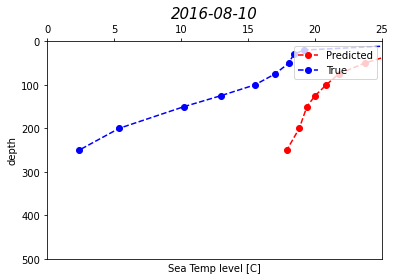

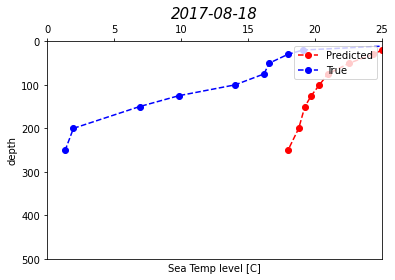

In [190]:
tmp=[]
tmp2=[]
for idx in range(len(X_org)):
        data_df=pd.DataFrame([results_yhat[idx][0]],columns=['10','20','30','50','75','100','125','150','200','250'])
        surface={'0':arr_x_list[idx][0]}
        temp_df=pd.DataFrame()
        temp_df=temp_df.append(surface, ignore_index=True)
        data_df=pd.concat([temp_df,data_df], axis=1)
        df=pd.DataFrame(data_df)
        for index, row in df.iterrows():
            tmp.append(row['0'])
            tmp.append(row['10'])
            tmp.append(row['20'])
            tmp.append(row['30'])
            tmp.append(row['50'])
            tmp.append(row['75'])
            tmp.append(row['100'])
            tmp.append(row['125'])
            tmp.append(row['150'])
            tmp.append(row['200'])
            tmp.append(row['250'])
    
            tmp2.append(arr_org_x_list[idx][0])
            tmp2.append(arr_org_list[idx][0])
            tmp2.append(arr_org_list[idx][1])
            tmp2.append(arr_org_list[idx][2])
            tmp2.append(arr_org_list[idx][3])
            tmp2.append(arr_org_list[idx][4])
            tmp2.append(arr_org_list[idx][5])
            tmp2.append(arr_org_list[idx][6])
            tmp2.append(arr_org_list[idx][7])
            tmp2.append(arr_org_list[idx][8])
            tmp2.append(arr_org_list[idx][9])
    
            Depth  = [0, 10,  20,  30,  50, 75, 100, 125, 150, 200, 250 ]
            fig = plt.figure()
            plt.title(X_Date['DATE'].iloc[idx],fontsize=15, fontstyle='italic',color='Black')
            ax = fig.add_subplot(111)
            ax.plot(tmp, Depth, 'ro--')
            ax.plot(tmp2, Depth, 'bo--')
            ax.xaxis.tick_top()
            ax.set_ylabel('depth')
            ax.set_ylim(500, 0)
            ax.set_xlim(0, 25)
            ax.set_xlabel('Sea Temp level [C]')
            ax.figure.legend(['Predicted','True'],bbox_to_anchor=(1,1),bbox_transform=ax.transAxes)
            plt.show()
            tmp=[]
            tmp2=[]